In [ ]:
# Full Pipeline: Preprocessing, Training, and Evaluation

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
# Load the dataset
from google.colab import files
uploaded_files = files.upload()
df = pd.read_csv("12.csv")
print(df['stroke'].value_counts())




Saving 12.csv to 12.csv
stroke
0    4861
1     249
Name: count, dtype: int64


In [ ]:
df.shape
df.info()
df.isnull().sum()/df.shape[0]*100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,0
id,0.000000
gender,0.000000
age,0.000000
hypertension,0.000000
heart_disease,0.000000
ever_married,0.000000
work_type,0.000000
Residence_type,0.000000
avg_glucose_level,0.000000
bmi,3.933464


In [ ]:
#checking balance or not
df['stroke'].value_counts()

,count
stroke,
0,4861
1,249


In [ ]:
# Drop irrelevant feature
df = df.drop(columns=['id'])

In [ ]:
# Impute missing values for 'bmi' column using median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
#df.isnull().sum()/df.shape[0]*100

In [ ]:
df.duplicated().sum()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.862035,7.699562,10.30,23.800,28.100,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [ ]:
# Encode categorical variables
label_enc = LabelEncoder()
df['gender'] = label_enc.fit_transform(df['gender'])
df['ever_married'] = label_enc.fit_transform(df['ever_married'])
df['Residence_type'] = label_enc.fit_transform(df['Residence_type'])

In [ ]:
# One-hot encode multiclass features
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=True)



In [ ]:
#we choose stroke as target
# Split features and target
X = df.drop(columns=['stroke'])
y = df['stroke']


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)



In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=500, random_state=42)
}



In [ ]:
# Dictionaries to store metrics
results = {}
f1_scores = {}
accuracies = {}
roc_aucs = {}
conf_matrices = {}


In [ ]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else preds

    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    auc = roc_auc_score(y_test, probs)
    cm = confusion_matrix(y_test, preds)

    results[name] = {'Accuracy': acc, 'F1 Score': f1, 'AUC': auc}
    f1_scores[name] = f1
    accuracies[name] = acc
    roc_aucs[name] = auc
    conf_matrices[name] = cm


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


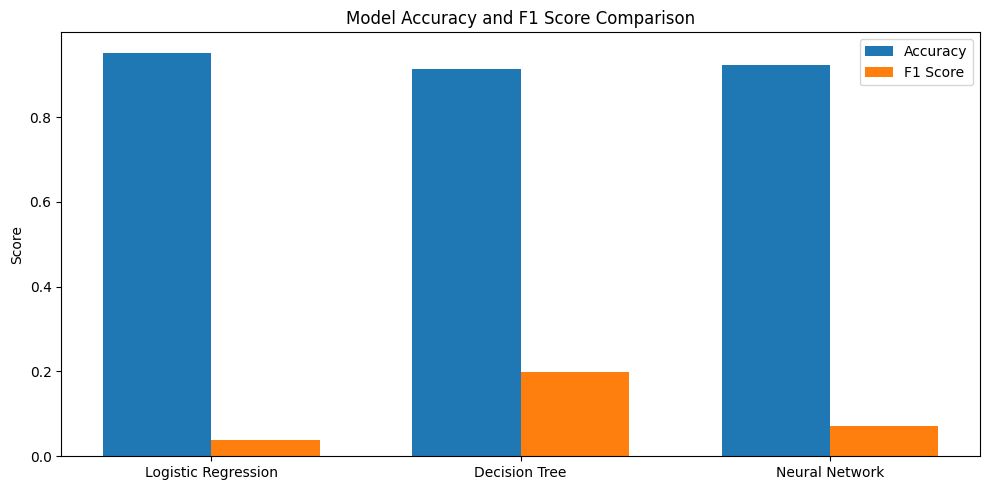

In [ ]:
# Plot bar chart of accuracies and F1 scores
plt.figure(figsize=(10, 5))
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, list(accuracies.values()), width=width, label='Accuracy')
plt.bar(x + width/2, list(f1_scores.values()), width=width, label='F1 Score')
plt.xticks(x, list(models.keys()))
plt.ylabel("Score")
plt.title("Model Accuracy and F1 Score Comparison")
plt.legend()
plt.tight_layout()
plt.show()


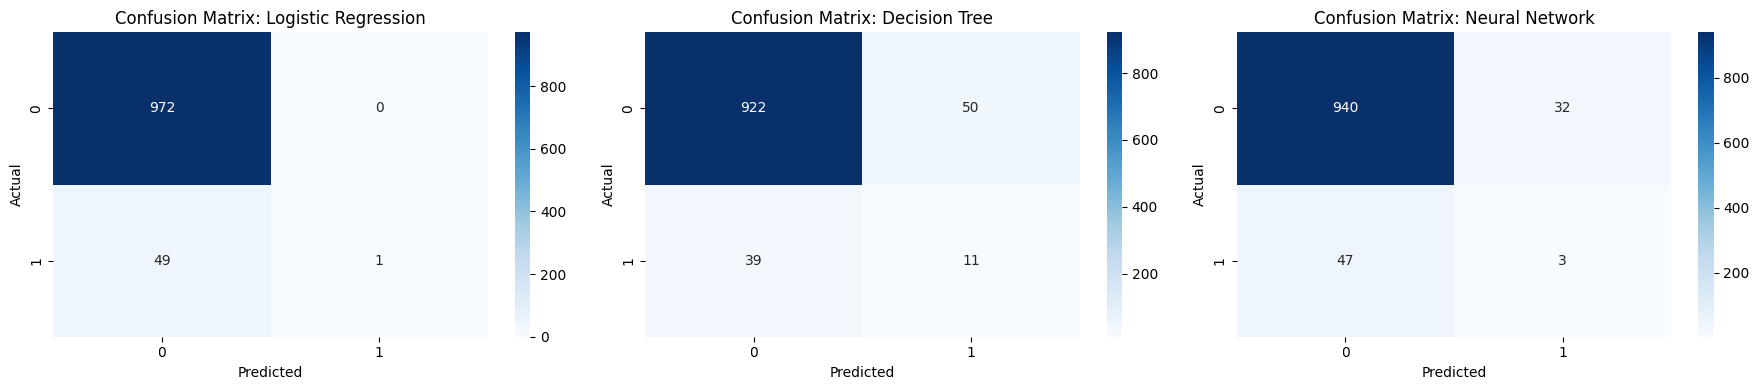

In [ ]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for idx, (name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx], cmap='Blues')
    axes[idx].set_title(f'Confusion Matrix: {name}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()

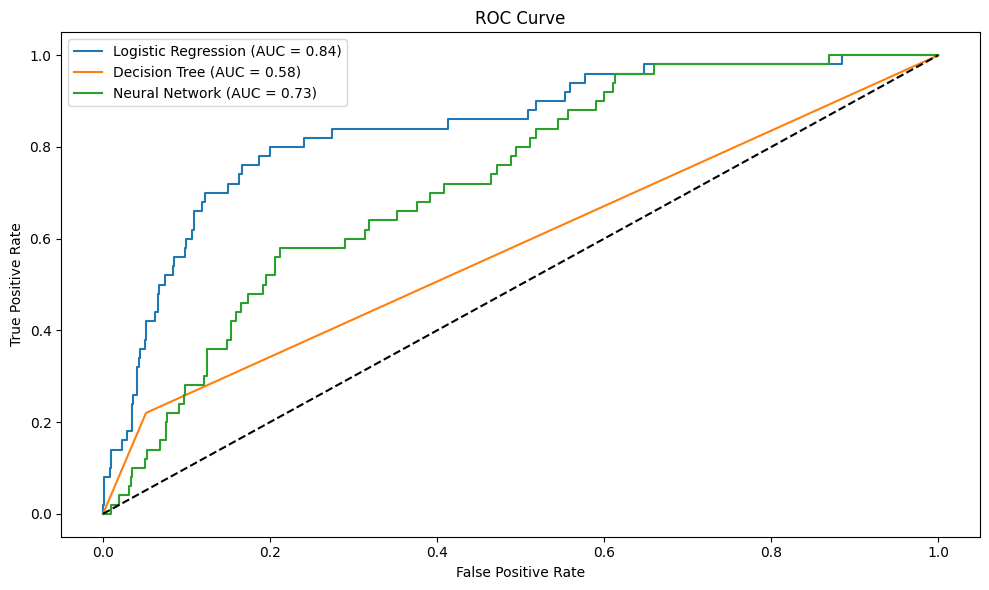

{'Logistic Regression': {'Accuracy': 0.952054794520548,
  'F1 Score': 0.0392156862745098,
  'AUC': np.float64(0.8420576131687243)},
 'Decision Tree': {'Accuracy': 0.9129158512720157,
  'F1 Score': 0.1981981981981982,
  'AUC': np.float64(0.5842798353909464)},
 'Neural Network': {'Accuracy': 0.9227005870841487,
  'F1 Score': 0.07058823529411765,
  'AUC': np.float64(0.725761316872428)}}

In [ ]:
# Plot ROC Curves
plt.figure(figsize=(10, 6))
for name, model in models.items():
    probs = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_aucs[name]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

results